In [1]:
## Overview 

In [2]:
### Import Libraries
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import decomposition
from joblib import dump, load

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score 
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

import time
import sys
sys.path.insert(0,'../../../../../utils/')
from helper_functions import *
#import helper_function custom library
from model_builder import ModelBuilder
pd.options.mode.chained_assignment = None
%matplotlib inline 

In [17]:
### Import and Clean Data
#load spectra data
#import_spectra
spectra = pd.read_csv("../../../../../data/imp_bands.csv")
df_aug = pd.read_csv("../../../../../data/refCanopies0802_0630.txt")
df_sep = pd.read_csv("../../../../../data/refCanopies0917_0630.txt")
df_oct = pd.read_csv("../../../../../data/refCanopies1016_0630.txt")

#load tree data
df_tree = pd.read_csv("../../../../../data/Export_Output_2_0630.txt")

In [18]:
#select 22 bands only
cols = list(df_aug.columns[:8]) + [str(i) for i in list(spectra.imp_bands)]
df_aug = df_aug[cols]
df_sep = df_sep[cols]
df_oct = df_oct[cols]
df_aug.head()

,ROIID,IDwithROI,X,Y,MapX,MapY,Lat,Lon,440.24,441.93,...,654.07,655.8,657.52,659.24,840.32,842.04,843.76,845.49,847.21,848.93
0,1,1,6558,1881,697516.92,4522326.17,40.828198,-96.657615,0.0159,0.0153,...,0.0242,0.0240,0.0230,0.0218,0.1312,0.1315,0.1323,0.1339,0.1361,0.1384
1,1,2,6559,1881,697517.52,4522326.17,40.828198,-96.657608,0.0155,0.0157,...,0.0236,0.0231,0.0223,0.0216,0.1339,0.1349,0.1362,0.1376,0.1399,0.1424
2,1,3,6560,1881,697518.12,4522326.17,40.828198,-96.657600,0.0164,0.0163,...,0.0298,0.0287,0.0275,0.0266,0.2173,0.2209,0.2228,0.2252,0.2275,0.2292
3,1,4,6561,1881,697518.72,4522326.17,40.828198,-96.657593,0.0164,0.0163,...,0.0298,0.0287,0.0275,0.0266,0.2173,0.2209,0.2228,0.2252,0.2275,0.2292
4,1,5,6562,1881,697519.32,4522326.17,40.828197,-96.657586,0.0175,0.0177,...,0.0337,0.0332,0.0324,0.0315,0.2763,0.2779,0.2804,0.2831,0.2855,0.2875


In [19]:
#holds evaluation metrics for species_hyper_ind
curr_evals = []

In [20]:
## August Image Models

In [21]:
### No Dimension Reduction

In [22]:
#clean and split data
mb_aug = ModelBuilder(df_aug,df_tree)
x_train,x_test,y_train,y_test = mb_aug.split_data()

data cleaning in progress ...

data cleaning completed.
   ROIID  IDwithROI  440.24  441.93  450.41   453.8  457.19  458.89  540.72  \
0      1          1  0.0159  0.0153  0.0180  0.0186  0.0183  0.0176  0.0271   
1      1          2  0.0155  0.0157  0.0186  0.0191  0.0202  0.0199  0.0257   
2      1          3  0.0164  0.0163  0.0188  0.0211  0.0208  0.0198  0.0346   
3      1          4  0.0164  0.0163  0.0188  0.0211  0.0208  0.0198  0.0346   
4      1          5  0.0175  0.0177  0.0204  0.0222  0.0214  0.0205  0.0377   

   556.13  ...   655.8  657.52  659.24  840.32  842.04  843.76  845.49  \
0  0.0291  ...  0.0240  0.0230  0.0218  0.1312  0.1315  0.1323  0.1339   
1  0.0285  ...  0.0231  0.0223  0.0216  0.1339  0.1349  0.1362  0.1376   
2  0.0352  ...  0.0287  0.0275  0.0266  0.2173  0.2209  0.2228  0.2252   
3  0.0352  ...  0.0287  0.0275  0.0266  0.2173  0.2209  0.2228  0.2252   
4  0.0409  ...  0.0332  0.0324  0.0315  0.2763  0.2779  0.2804  0.2831   

   847.21  848.93  TARGE

In [23]:
#build random forest model with ntree = 100
model_aug = mb_aug.build_model(x_train, y_train)

model building in progress ...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.4s finished


model building completed.


[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.3s finished


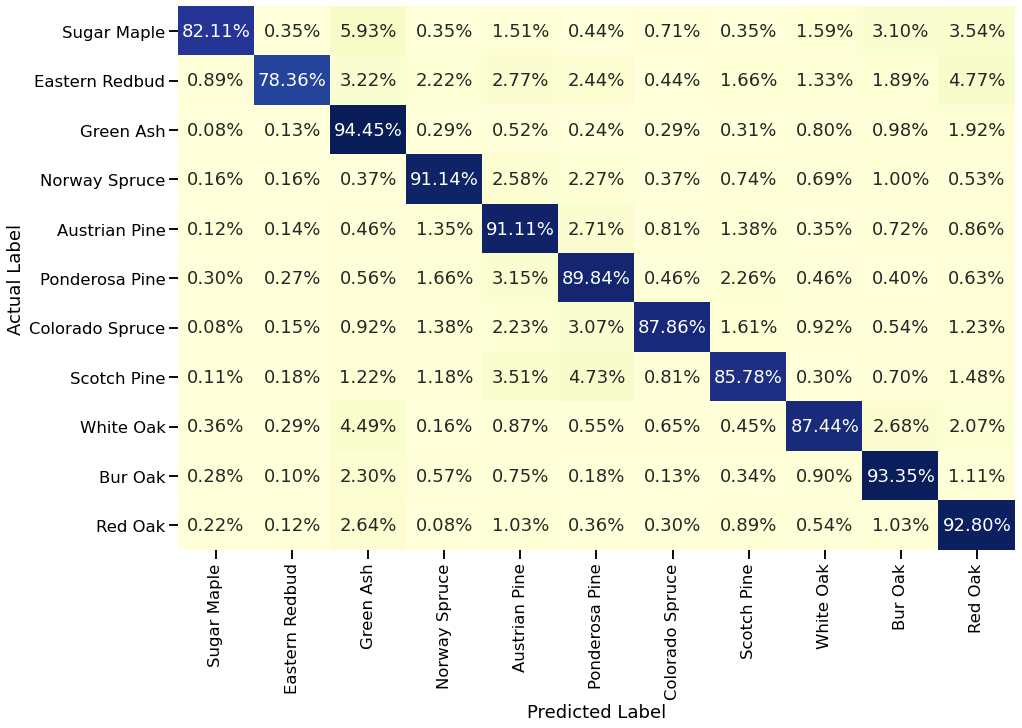

In [24]:
#evaluate the model
#create a confusion matrix
labels = ['Sugar Maple', "Eastern Redbud", "Green Ash", 'Norway Spruce','Austrian Pine','Ponderosa Pine',
          'Colorado Spruce', 'Scotch Pine','White Oak','Bur Oak', 'Red Oak']
nclasses = 11
model_name = 'species_multi22_ind_nd_aug'
curr_evals.append(pd.DataFrame.from_dict(evaluate_model(model_aug,model_name,
                                                       x_train,y_train,x_test,y_test,nclasses,labels)))

In [25]:
#save the model
save_model(model_aug,model_name)

In [28]:
## September Image Models

In [29]:
### No Dimension Reduction

In [30]:
#clean and split data
mb_sep = ModelBuilder(df_sep,df_tree)
x_train,x_test,y_train,y_test = mb_sep.split_data()

data cleaning in progress ...

data cleaning completed.
   ROIID  IDwithROI  440.24  441.93  450.41   453.8  457.19  458.89  540.72  \
0      1          1  0.0116  0.0127  0.0184  0.0195  0.0196  0.0185  0.0258   
1      1          2  0.0116  0.0127  0.0184  0.0195  0.0196  0.0185  0.0258   
2      1          3  0.0196  0.0191  0.0194  0.0186  0.0192  0.0198  0.0317   
3      1          4  0.0196  0.0191  0.0194  0.0186  0.0192  0.0198  0.0317   
4      1          5  0.0175  0.0186  0.0242  0.0239  0.0250  0.0251  0.0385   

   556.13  ...   655.8  657.52  659.24  840.32  842.04  843.76  845.49  \
0  0.0257  ...  0.0224  0.0212  0.0196  0.1420  0.1444  0.1463  0.1482   
1  0.0257  ...  0.0224  0.0212  0.0196  0.1420  0.1444  0.1463  0.1482   
2  0.0346  ...  0.0320  0.0309  0.0295  0.1508  0.1541  0.1571  0.1595   
3  0.0346  ...  0.0320  0.0309  0.0295  0.1508  0.1541  0.1571  0.1595   
4  0.0427  ...  0.0336  0.0326  0.0314  0.2224  0.2228  0.2247  0.2270   

   847.21  848.93  TARGE

In [31]:
#build random forest model with ntree = 100
model_sep = mb_sep.build_model(x_train, y_train)

model building in progress ...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished


model building completed.


[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.3s finished


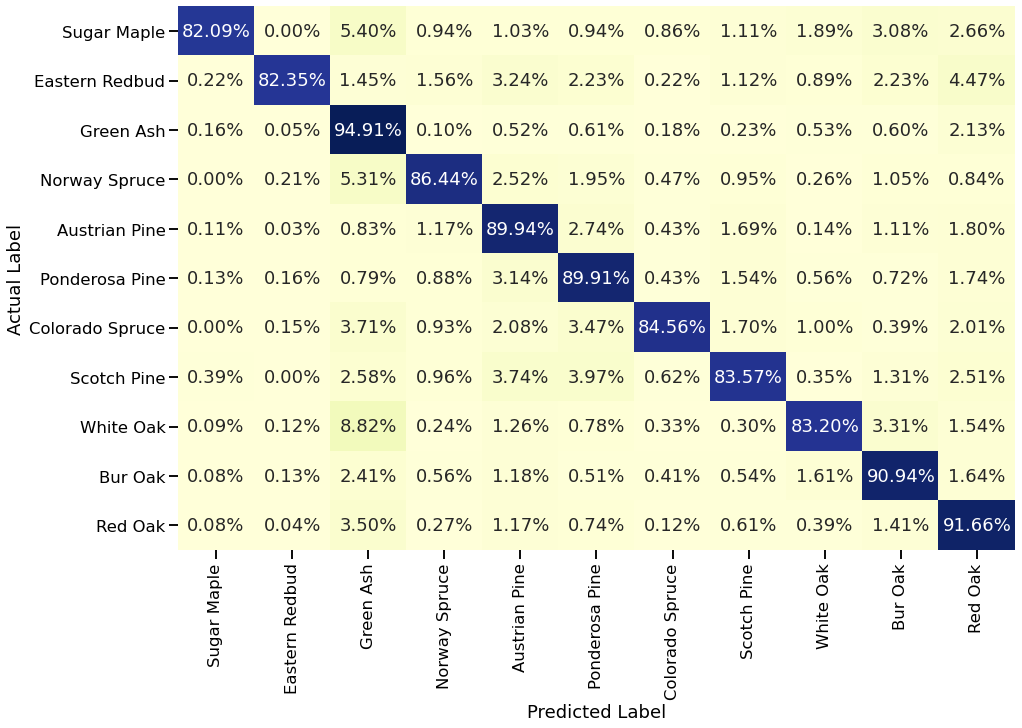

In [32]:
model_name = 'species_multi22_ind_nd_sep'
curr_evals.append(pd.DataFrame.from_dict(evaluate_model(model_sep,model_name,
                                                       x_train,y_train,x_test,y_test,nclasses,labels)))

In [33]:
#save the model
save_model(model_sep,model_name)

In [34]:
## October Image Models

In [35]:
### No Dimension Reduction

In [36]:
#clean and split data
mb_oct = ModelBuilder(df_oct,df_tree)
x_train,x_test,y_train,y_test = mb_oct.split_data()

data cleaning in progress ...

data cleaning completed.
   ROIID  IDwithROI  440.24  441.93  450.41   453.8  457.19  458.89  540.72  \
0      1          1  0.0082  0.0084  0.0098  0.0104  0.0095  0.0089  0.0147   
1      1          2  0.0082  0.0084  0.0098  0.0104  0.0095  0.0089  0.0147   
2      1          3  0.0092  0.0098  0.0098  0.0111  0.0128  0.0121  0.0152   
3      1          4  0.0092  0.0098  0.0098  0.0111  0.0128  0.0121  0.0152   
4      1          5  0.0063  0.0072  0.0089  0.0104  0.0097  0.0089  0.0181   

   556.13  ...   655.8  657.52  659.24  840.32  842.04  843.76  845.49  \
0  0.0168  ...  0.0140  0.0132  0.0127  0.0879  0.0872  0.0863  0.0852   
1  0.0168  ...  0.0140  0.0132  0.0127  0.0879  0.0872  0.0863  0.0852   
2  0.0176  ...  0.0157  0.0149  0.0139  0.0907  0.0906  0.0912  0.0926   
3  0.0176  ...  0.0157  0.0149  0.0139  0.0907  0.0906  0.0912  0.0926   
4  0.0207  ...  0.0169  0.0165  0.0157  0.1234  0.1231  0.1230  0.1238   

   847.21  848.93  TARGE

In [37]:
#build random forest model with ntree = 100
model_oct = mb_oct.build_model(x_train, y_train)

model building in progress ...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.5s finished


model building completed.


[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.7s finished
[Parallel(n_jobs=40)]: Using backend ThreadingBackend with 40 concurrent workers.
[Parallel(n_jobs=40)]: Done 100 out of 100 | elapsed:    0.2s finished


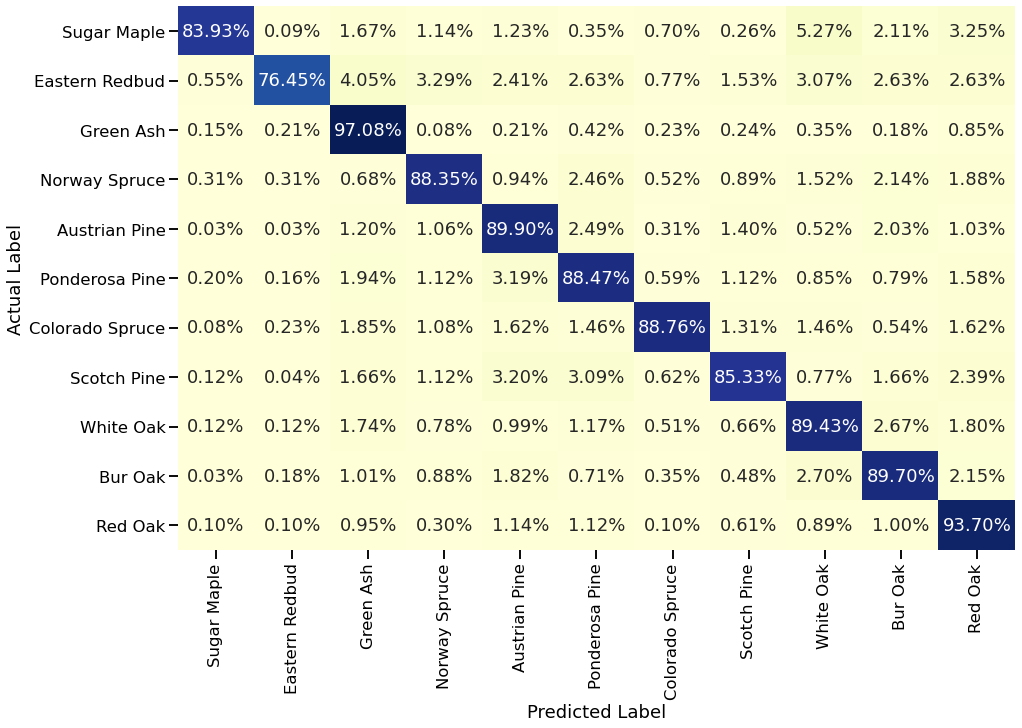

In [38]:
#evaluate the model
model_name = 'species_multi22_ind_nd_oct'
curr_evals.append(pd.DataFrame.from_dict(evaluate_model(model_oct,model_name,
                                                       x_train,y_train,x_test,y_test,nclasses,labels)))

In [39]:
#save the model
save_model(model_oct,model_name)

In [40]:
#concatenate all current results into one dataframe
df_curr_evals = pd.concat(curr_evals)
#save the current results
df_curr_evals.to_csv('species_multi22_ind_summary_results.csv')


In [41]:
df_curr_evals

,Model,Train Accuracy(%),Test Accuracy(%)
0,species_multi22_ind_nd_aug,99.825409,90.572452
0,species_multi22_ind_nd_sep,98.578119,89.178935
0,species_multi22_ind_nd_oct,99.663278,90.559971
